# Групповой проект №1. Первичный анализ данных "Международные авиаперевозки в США"

<img src="https://image.shutterstock.com/z/stock-vector-set-of-vector-tags-with-usa-airport-codes-vector-illustration-for-travelers-famous-american-451061281.jpg" height="400" />

Данные взяты из [отчета по статистике международных авиапассажирских и грузовых перевозок США](https://www.transportation.gov/policy/aviation-policy/us-international-air-passenger-and-freight-statistics-report#TheReports).

Этот же датасет, но в гугл драйв: https://drive.google.com/drive/folders/1P3i89WzfkVmC2L53G9qQxjzWJ3NSanat?usp=sharing

В ноутбуке скачивание данных происходит по ссылке с гугл-драйв, просьба не изменять.


Доступен следующий набор данных:

- **International_Report_Passengers.csv**: данные об общем количестве пассажиров за каждый месяц и год между парой аэропортов, обслуживаемых конкретной авиакомпанией.
Данные о пассажирах и грузоперевозках в США являются конфиденциальными в первые 6 месяцев, после чего они могут быть опубликованы. Количество пассажиров записывается в трех столбцах: «По расписанию», «Чартер» и «Всего»: "Scheduled", "Charter", "Total".

Описание атрибутов доступно по ссылке: https://data.transportation.gov/Aviation/International_Report_Passengers/xgub-n9bw


## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на занятии.  
Ссылка на шаблон к презентации: [ссылка](https://docs.google.com/presentation/d/1eydwcHaGKznePEbFuRT810cEGLgB3YYqpy-cDeRx_ik/edit?usp=sharing).  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы, после чего вернутся к вам с фидбеком. 

**Вопросы, на которые нужно ответить в презентации перечислены в ноутбуке.**

Любой хороший data-scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

При возникновении каких-либо проблем при выполнении группового проекта обязательно сразу пишите Екатерине (@poka_katt). 

## Требования к оформлению графиков (в ноутбуке и в презентации)

1. Каждый график необходимо подписывать
2. Оси Х и У всегда подписаны
3. Выбрана подходящая шкала и шаг 
4. Не забывайте про логарифмическую шкалу и всегда используйте при необходимости!


# Итак, приступим

Импортируем необходимые библиотеки

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Загрузим International_Report_Passengers.csv

In [ ]:
url='https://drive.google.com/file/d/1nvi3GFkmZDXSbLrTe_ZmyNAjZGQ74A4D/view?usp=sharing'

url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df1 = pd.read_csv(url2, delimiter=',')
df1.dataframeName = 'International_Report_Passengers.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 693122 rows and 16 columns


## Посмотрим на наш датасет

In [ ]:
df1

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,07/01/2004,2004,7,14747,SEA,93,16229,YVR,906,19687,QX,1,Passengers,19265,0,19265
1,11/01/2008,2008,11,11697,FLL,33,12010,GUA,127,20416,NK,1,Passengers,3099,0,3099
2,10/01/2002,2002,10,10257,ALB,22,16271,YYZ,936,20206,QK,0,Passengers,33,0,33
3,03/01/2007,2007,3,12889,LAS,85,13165,MAN,493,19541,BD,0,Passengers,3815,0,3815
4,03/01/2009,2009,3,12892,LAX,91,13252,MEX,148,19534,AM,0,Passengers,17993,0,17993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693117,03/01/2021,2021,3,99999,ZZZ,1,11519,EIS,282,21743,2LQ,1,Passengers,0,16,16
693118,03/01/2021,2021,3,99999,ZZZ,1,11731,FPO,204,21743,2LQ,1,Passengers,0,9,9
693119,03/01/2021,2021,3,99999,ZZZ,1,13605,NAS,204,21743,2LQ,1,Passengers,0,19,19
693120,03/01/2021,2021,3,99999,ZZZ,1,14682,SAQ,204,21743,2LQ,1,Passengers,0,77,77


## Отсортируем данные по дате

In [ ]:
df1.sort_values(by=['Year','Month'], inplace=True)
#Аргумент «inplace = True» означает, что фрейм данных должен сделать изменения постоянными,
#То есть сохранит изменения в загруженной таблице (у нас это df1)

In [ ]:
df1

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
294485,01/01/1990,1990,1,11042,CLE,44,11032,CUN,148,19892,ACQ,0,Passengers,0,796,796
294617,01/01/1990,1990,1,12892,LAX,91,14228,PPT,823,19508,UT,0,Passengers,1790,0,1790
294655,01/01/1990,1990,1,13495,MSY,72,11032,CUN,148,19556,LR,0,Passengers,1515,0,1515
294671,01/01/1990,1990,1,12173,HNL,2,16232,YWG,926,19523,CP,0,Passengers,2370,0,2370
294762,01/01/1990,1990,1,13303,MIA,33,10846,BZE,106,20144,TX,0,Passengers,6489,0,6489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693117,03/01/2021,2021,3,99999,ZZZ,1,11519,EIS,282,21743,2LQ,1,Passengers,0,16,16
693118,03/01/2021,2021,3,99999,ZZZ,1,11731,FPO,204,21743,2LQ,1,Passengers,0,9,9
693119,03/01/2021,2021,3,99999,ZZZ,1,13605,NAS,204,21743,2LQ,1,Passengers,0,19,19
693120,03/01/2021,2021,3,99999,ZZZ,1,14682,SAQ,204,21743,2LQ,1,Passengers,0,77,77


# Посмотрим на кол-во записей в таблице для 2010-2020 годов

In [ ]:
# 1ый способ:
n_flights = df1.loc[df1['Year']==2010]
print(len(n_flights))

23551


In [ ]:
# 2ой способ
n_flights = df1.query('Year==2010')
print(len(n_flights))

23551


 Согласитесь второй способ (с использованием "query") удобнее и красивее?

In [ ]:
# можно писать несколько условий
df1.query("Year==2020 & carriergroup==0").groupby('Month')['Total'].count()

Month
1     1241
2     1227
3     1196
4      271
5      217
6      313
7      411
8      430
9      447
10     460
11     507
12     584
Name: Total, dtype: int64

In [ ]:
years_to_check = np.arange(2010, 2022)

for year in years_to_check:
    n_flights = df1.query('Year=='+str(year))
    print(f"Для {year} года в таблице {len(n_flights)} записей.") #Как видите, в методе print() для вывода использован f-string.
                                                                    #Почитать подробнее можно здесь: https://realpython.com/python-f-strings/

Для 2010 года в таблице 23551 записей.
Для 2011 года в таблице 24516 записей.
Для 2012 года в таблице 24070 записей.
Для 2013 года в таблице 24464 записей.
Для 2014 года в таблице 25843 записей.
Для 2015 года в таблице 27234 записей.
Для 2016 года в таблице 28645 записей.
Для 2017 года в таблице 29998 записей.
Для 2018 года в таблице 30667 записей.
Для 2019 года в таблице 30436 записей.
Для 2020 года в таблице 15868 записей.
Для 2021 года в таблице 4183 записей.


В методе print() для вывода использован f-string. Почитать подробнее можно здесь: https://realpython.com/python-f-strings/

In [ ]:
# Проверим пропуски
df1.isna().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         2797
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

#Описание полей

usg_apt_id - US Gateway Airport ID - assigned by US DOT to identify an airport

usg_apt - US Gateway Airport Code - usually assigned by IATA, but in absence of IATA designation, may show FAA-assigned code

usg_wac - US Gateway World Area Code - assigned by US DOT to represent a geographic territory

fg_apt_id - Foreign Gateway Airport ID - assigned by US DOT to identify an airport

fg_apt - Foreign Gateway Airport Code - usually assigned by IATA, but in absense of IATA designation, may show FAA-assigned code

fg_wac - Foreign Gateway World Area Code - assigned by US DOT to represent a geographic territory

airlineid - Airline ID - assigned by US DOT to identify an air carrier

carrier - IATA-assigned air carrier code. If carrier has no IATA code, ICAO- or FAA-assigned code may be used

carriergroup - Carrier Group Code - 1 denotes US domestic air carriers, 0 denotes foreign air carriers

type - Defines the type of the four metrics in this report

Scheduled - Metric flown by scheduled service operations

Charter - Metric flown by charter operations

Total - Total Metric flown by scheduled service and charter operations





In [ ]:
import matplotlib as mpl
import re
import warnings
from matplotlib.ticker import MultipleLocator

warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", mpl.MatplotlibDeprecationWarning)
warnings.simplefilter("ignore", UserWarning)
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

# Задание 1. Пассажирский трафик
**Вопрос 1: Постройте график изменения кол-ва перевезенных людей (столбец Total) за январь-декабрь 2019 года и за январь-декабрь 2020. Можно построить в два графика или отразить 2 кривые на одном (второй вариант предпочтительнее, но тогда не забудьте изменить цвет у кривых). Какой вывод можно сделать исходя из графиков?**

Ответ:


Сформируем датасет для работы над задачей:

In [ ]:
df_task11 = pd.concat([df1.query('Year==2019'), df1.query('Year==2020')])

Подсчитываем суммы перевозок и агрегируем по месяцам и годам:

In [ ]:
df_task11_grouped = df_task11.groupby(['Year', 'Month']).agg({'Total': 'sum'}).reset_index()

Приведем значения перевозок к миллионам человек для наглядного отображения на графике:

In [ ]:
df_task11_grouped.Total = np.round(df_task11_grouped.Total / 1000000, 2) 

Построим график, создав для него подходящии палитру цветов, подписи и их размер:

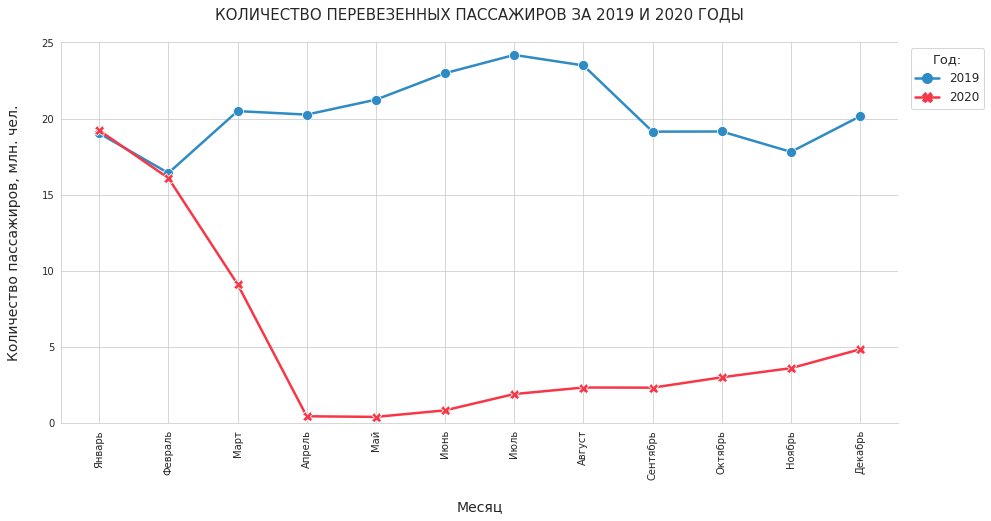

In [ ]:
labels  = ['', 'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
user_palette_2c = sns.diverging_palette(240, 10, s=90, l=55, n=2)
sns.set_style(style='whitegrid')
plt.figure(figsize=(15,7))
sns.set_context(rc = {'lines.linewidth': 2.5, 'lines.markersize': 10})
lnplt = sns.lineplot(data=df_task11_grouped, x='Month', y='Total', hue='Year', style='Year', 
                     markers=True, dashes=False, palette=user_palette_2c, ci=0)
lnplt.set_title(str.upper('количество перевезенных пассажиров за 2019 и 2020 годы\n'), fontsize=15)
lnplt.legend(title_fontsize=13, fontsize=12, title='Год:', bbox_to_anchor=(1.11, 1))
lnplt.set(ylim=(0, 25))
lnplt.set_xlabel('\nМесяц', fontsize=14)
lnplt.set_ylabel('Количество пассажиров, млн. чел.\n',fontsize=14)
lnplt.set_xticklabels(labels, rotation=90)
lnplt.xaxis.set_major_locator(MultipleLocator(1))
sns.despine()

В течении 2019 года наблюдается рост трафика с пиком в июле-августе и далее небольшое снижение до 8000 человек к концу года.

С февраля 2020 года виден резкий спад перевозок с уровня около 7000 человк в январе до тысячи человек к апрелю. Далее с мая происходит стабильный рост трафика до 3000 человек к концу года с незначительной коррекцией в сентябре.

Падение трафика в 2020 очевидно вызвано ограничительными мерами, принятыми в связи с распространением COVID-19. Первый случай заражения на территории США выявлен в январе 2020 года. Первичное снижение в период январь-февраль носит социальный характер, ограничения в данный период не вводились, однако под влиянием СМИ менялось социальное поведение людей. Стремительное распорстранение заболевания повлияло на резкое сокращение пассажирских перевозок (практически до нулевых значений) в марте (за март 2020 в США колиство инфицированных возросло с 42 до 185991). 19 марта 2020 Государственный Департамент США рекомендовал населению избегать международных путешествий.

**Вопрос 2: как изменился (в процентах) трафик между США и другими странами в период с января по декабрь 2020 года по сравнению с январем-декабрем 2019 года? (трафик=кол-во перевезенных за месяц людей). Изобразите в виде графика: по оси Х - месяц+год, по оси У - изменение трафика в процентах.**

Ответ:

Сформируем датасет для работы над задачей:

In [ ]:
df_task12 = pd.concat([df1.query('carriergroup==0 & Year==2019'), df1.query('carriergroup==0 & Year==2020')])
df_task12_grouped = df_task12.set_index(['Year', 'data_dte']).groupby(level=1).sum().reset_index()
df_task12_grouped['Year'] = df_task12_grouped['data_dte'].apply(lambda k: re.search(r'\w+$', k)[0])
df_task12_grouped['labels'] = df_task12_grouped['data_dte'].apply(lambda k: re.search(r'^\w+', k)[0] + re.search(r'\/\w+$', k)[0])

Рассчитаем процент изменения трафика и создадим будущие подписи с значениям оси абсцис:

In [ ]:
per = np.round(100 * df_task12_grouped.query("Year=='2020'").reset_index()['Total'] / df_task12_grouped.query("Year=='2019'").reset_index()['Total'], 2)
per = pd.DataFrame(per)
labels  = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
per['labels'] = labels

Построим график:

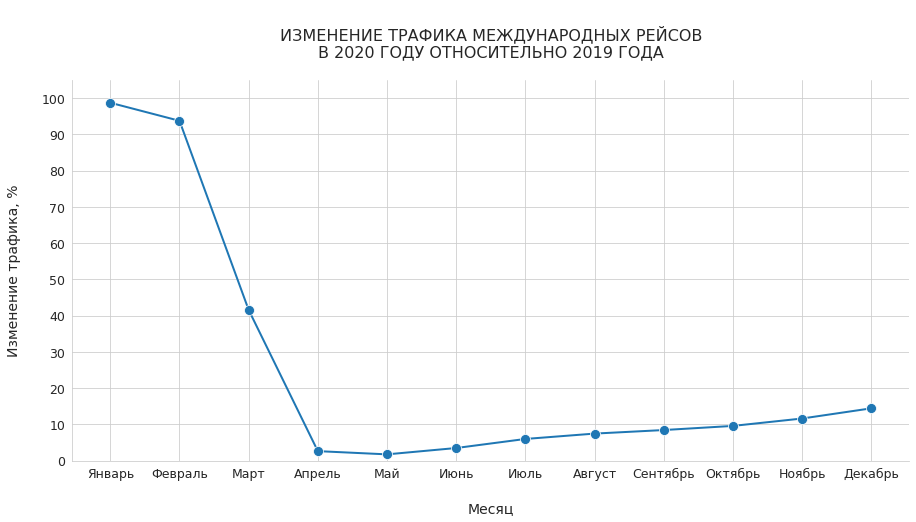

In [ ]:
user_palette_1c_blue = sns.diverging_palette(240, 240, s=90, l=55, n=1)
sns.set_style(style='whitegrid')
plt.figure(figsize=(15,7))
sns.set_context(rc = {'lines.linewidth': 2.0, 'lines.markersize': 10})
lnplt = sns.lineplot(data=per, x='labels', y='Total', marker='o', palette=user_palette_1c_blue)
lnplt.set(ylim=(0, 105))
lnplt.set_title(str.upper('\nизменение трафика международных рейсов\nв 2020 году относительно 2019 года\n'), fontsize=16)
lnplt.set_xlabel('\nМесяц', fontsize=14)
lnplt.set_ylabel('Изменение трафика, %\n',fontsize=14)
lnplt.yaxis.set_major_locator(MultipleLocator(10))
lnplt.set_xticklabels(per.labels, fontsize=12.5)
lnplt.set_yticklabels(lnplt.get_yticks().astype(int), fontsize=12.5)
sns.despine()

На графике видно на сколько произошло изменение трафика в каждом месяце, например в октябре 2020 года трафик упал на 90% по отношению к этому же месяцу 2019 года.

# Задание 2. Загруженность авиакомпаний

**Вопрос 3: Нарисуйте топ 5 популярных авиакомпаний (airlineid, carrier) за все года (1990-2021). По оси Х на графике укажите название авикомпании (БЕЗ кода), по оси У - кол-во перевезенных людей за все года.**

Ответ:

Для анализа выбираем признак 'airlineid', т.к. в нем нет пропусков:

In [ ]:
df_task2 = df1.copy

In [ ]:
df1.loc[:, ['airlineid', 'carrier']].isna().sum()

airlineid       0
carrier      2797
dtype: int64

Под популярностью подразумеваем наиболее часто пользующуюся спросом, т.е. чащего всего встречающуюся.\
Таким образом, ТОП-5 популярных авиакомпаний:

In [ ]:
df1.airlineid.value_counts().sort_values(ascending=False).head(5)

19805    59777
19790    48755
19977    43473
19704    25533
19531    20363
Name: airlineid, dtype: int64

Сформируем список id-кодов авиаперевозчиков в системе United States Department of Transportation:

In [ ]:
top5_airlineid = df1.airlineid.value_counts().sort_values(ascending=False).head(5).index.tolist()
top5_airlineid

[19805, 19790, 19977, 19704, 19531]

In [ ]:
df_task2 = df1[df1.airlineid.isin(top5_airlineid)]

Найдем из международные коды. Список их IATA кодов:

In [ ]:
airlineid_to_names = pd.DataFrame(df_task2.groupby(['airlineid']).nth([1])['carrier']).reset_index()
airlineid_to_names

,airlineid,carrier
0,19531,AC
1,19704,CO
2,19790,DL
3,19805,AA
4,19977,UA


На сайте https://www.iata.org/en/publications/directories/code-search/ ищем название компаний:

In [ ]:
carrier_names = {
    'AC': ['Air Canada'],
    'CO': ['North-Western Cargo Int. Airlines'],
    'DL': ['Delta Air Lines'],
    'AA': ['American Airlines'],
    'UA': ['United Airlines']
}

In [ ]:
carrier_names = pd.DataFrame(carrier_names, index=['name']).T.reset_index().rename(columns={'index': 'carrier'})
carrier_names

,carrier,name
0,AC,Air Canada
1,CO,North-Western Cargo Int. Airlines
2,DL,Delta Air Lines
3,AA,American Airlines
4,UA,United Airlines


Соотнесем коды перевозчиков по системам US DOT и IATA:

In [ ]:
airlineid_to_names = airlineid_to_names.merge(carrier_names, how='left', left_on='carrier', right_on='carrier')
airlineid_to_names

,airlineid,carrier,name
0,19531,AC,Air Canada
1,19704,CO,North-Western Cargo Int. Airlines
2,19790,DL,Delta Air Lines
3,19805,AA,American Airlines
4,19977,UA,United Airlines


Сагрегируем перевозки датасета задачи по перевозчикам:

In [ ]:
df_task2_grouped = df_task2.groupby(['airlineid'], as_index=False).sum().sort_values(['Total'], ascending=False).reset_index().drop(columns=['index'])
df_task2_grouped

,airlineid,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,carriergroup,Scheduled,Charter,Total
0,19805,119953691,384841,768348467,2534806,785429856,21311482,59777,593456143,1589331,595045474
1,19977,87354401,277920,557541713,2238449,574432141,20537428,43473,421232949,568167,421801116
2,19790,97938632,310059,578207148,1955173,637021922,20584589,48755,387201102,418096,387619198
3,19704,51121286,166157,309214599,1089547,333903459,9391509,25533,171309683,2553201,173862884
4,19531,40838628,127949,263344476,974681,329372950,18740195,0,140138339,2575745,142714084


И добавим к нему из наименования:

In [ ]:
df_task2_grouped = df_task2_grouped.merge(airlineid_to_names, how='left', left_on='airlineid', right_on='airlineid')
df_task2_grouped

,airlineid,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,carriergroup,Scheduled,Charter,Total,carrier,name
0,19805,119953691,384841,768348467,2534806,785429856,21311482,59777,593456143,1589331,595045474,AA,American Airlines
1,19977,87354401,277920,557541713,2238449,574432141,20537428,43473,421232949,568167,421801116,UA,United Airlines
2,19790,97938632,310059,578207148,1955173,637021922,20584589,48755,387201102,418096,387619198,DL,Delta Air Lines
3,19704,51121286,166157,309214599,1089547,333903459,9391509,25533,171309683,2553201,173862884,CO,North-Western Cargo Int. Airlines
4,19531,40838628,127949,263344476,974681,329372950,18740195,0,140138339,2575745,142714084,AC,Air Canada


Сформируем порядок отоборажения перевозчиков на графике и подписи по оси абсцис:

In [ ]:
order = df_task2_grouped['name']

In [ ]:
labels = [
    'American Airlines',
    'United Airlines',
    'Delta Air Lines',
    'North-Western Cargo\nInt. Airlines',
    'Air Canada']

Построим график:

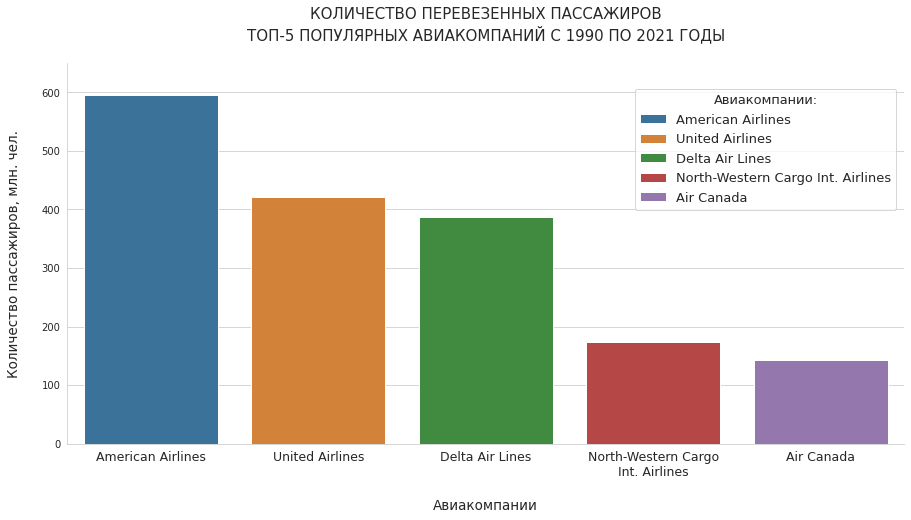

In [ ]:
user_palette_5dc = sns.color_palette('tab10', n_colors=5, desat=0.85)
sns.set_style(style='whitegrid')
plt.figure(figsize=(15,7))
brplt = sns.barplot(data=df_task2_grouped, x='name', y='Total', hue='name', 
                    dodge=False, palette=user_palette_5dc, ci=0, estimator=lambda k: np.round(k/1000000, 3))
brplt.set(ylim=(0, 650))
brplt.set_title(str.upper('количество перевезенных пассажиров\nтоп-5 популярных авиакомпаний с 1990 по 2021 годы\n'), fontsize=15)
brplt.legend(title='Авиакомпании:', title_fontsize=13, fontsize=13, bbox_to_anchor=(0.67, 0.95))
brplt.set_xlabel('\nАвиакомпании', fontsize=13.5)
brplt.set_ylabel('Количество пассажиров, млн. чел.\n',fontsize=13.5)
brplt.set_xticklabels(labels, fontsize=12.5)
sns.despine()

На графике в порядке убывания популярности отображены перевозчики.

**Вопрос 4: Какая авиакомпания самая "быстрорастущая", если оценивать рост по кол-ву перевезенных людей? Какая компания теряет клиентов?**

Ответ:

Сформируем датасет для работы над задачей. Для этого примем, что период роста определяется годом 2005 (в заисимости от потребности период может быть изменен):

In [ ]:
df_task24 = df1[df1.Year >= 2005].reset_index().drop(columns=['index'])
df_task24

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,01/01/2005,2005,1,14843,SJU,3,10312,ANU,206,20414,OW,1,Passengers,4784,0,4784
1,01/01/2005,2005,1,12889,LAS,85,13252,MEX,148,20152,6A,0,Passengers,1572,0,1572
2,01/01/2005,2005,1,11618,EWR,21,14239,PRG,418,20183,OK,0,Passengers,4374,0,4374
3,01/01/2005,2005,1,12478,JFK,22,11332,DKR,569,19570,SA,0,Passengers,9327,0,9327
4,01/01/2005,2005,1,11057,CLT,36,14838,SJO,110,20355,US,1,Passengers,3602,0,3602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406125,03/01/2021,2021,3,99999,ZZZ,1,11519,EIS,282,21743,2LQ,1,Passengers,0,16,16
406126,03/01/2021,2021,3,99999,ZZZ,1,11731,FPO,204,21743,2LQ,1,Passengers,0,9,9
406127,03/01/2021,2021,3,99999,ZZZ,1,13605,NAS,204,21743,2LQ,1,Passengers,0,19,19
406128,03/01/2021,2021,3,99999,ZZZ,1,14682,SAQ,204,21743,2LQ,1,Passengers,0,77,77


Сагрегируем суммы перевозок по месяцам и перевозчикам (работаем с признаком 'airlineid', т.к. он не имеет пропуском, обладая наибольшей информацией):

In [ ]:
df_task24.groupby(['airlineid', 'Year']).agg({'Total': 'sum'})

Total
airlineid Year         
19386     2005  7913021
          2006  7833564
          2007  8044274
          2008  8428537
          2009  6719379
...                 ...
22072     2020    15352
22073     2021       11
22074     2020       45
          2021       40
22077     2021       12

[3544 rows x 1 columns]

Рассчитаем кумулятивные суммы для каждого перевозчика по годам с начала выбранного периода:

In [ ]:
df_task24_cumsum = df_task24.groupby(['airlineid', 'Year']).agg({'Total': 'sum'}).cumsum()
df_task24_cumsum

Total
airlineid Year            
19386     2005     7913021
          2006    15746585
          2007    23790859
          2008    32219396
          2009    38938775
...                    ...
22072     2020  2858661699
22073     2021  2858661710
22074     2020  2858661755
          2021  2858661795
22077     2021  2858661807

[3544 rows x 1 columns]

Для рассчета абсолютного прироста перевозок необходимо вычесть начальные значения периода:

In [ ]:
df_task24_cumsum.reset_index(level=1, inplace=True)
list_of_comp = df_task24_cumsum.index.unique().tolist()

In [ ]:
tl = []
for ind, comp in enumerate(list_of_comp):
    if df_task24_cumsum.loc[comp].shape[0] > 2:
        delta = df_task24_cumsum.loc[comp].Total.iloc[-1] - df_task24_cumsum.loc[comp].Total.iloc[0]
    tl.append((comp, delta))
df_airID = pd.DataFrame(tl, columns=['airlineid', 'delta']).sort_values(by='delta', ascending=False).head(5).reset_index().drop(columns=['index'])
df_airID

,airlineid,delta
0,19805,341229860
1,19977,279132160
2,19790,276732174
3,19540,92192759
4,19554,75748531


Рассчет показал пять перевозчиков с наибольшим приростом перевозок с 2005 года.

Приведем их обозначения в системе US DOT:

In [ ]:
list_airID = df1[df1.airlineid.isin(df_airID.airlineid)].carrier.unique()
list_airID

array(['UA', 'LH', 'AA', 'BA', 'DL'], dtype=object)

Соотнесем коды полученных перевозчиков c их наименованиями, сохранив порядок в предыдущей выдаче, таким образом в легендк графика авиакомпании будут расположены в порядке убывания прироста перевозок:

In [ ]:
carrier_names = {
    'BA': 'British Airways',
    'LH': 'Deutsche Lufthansa',
    'DL': 'Delta Air Lines',
    'AA': 'American Airlines',
    'UA': 'United Airlines'
}

In [ ]:
carrier_names = pd.DataFrame(carrier_names, index=['name']).T.reset_index().rename(columns={'index': 'carrier'})
carrier_names

,carrier,name
0,BA,British Airways
1,LH,Deutsche Lufthansa
2,DL,Delta Air Lines
3,AA,American Airlines
4,UA,United Airlines


In [ ]:
airlineid_to_names = pd.DataFrame(df_task24.groupby(['airlineid']).nth([1])['carrier']).reset_index()
carrier_names_2 = df_airID.merge(airlineid_to_names).merge(carrier_names)
carrier_names_2

,airlineid,delta,carrier,name
0,19805,341229860,AA,American Airlines
1,19977,279132160,UA,United Airlines
2,19790,276732174,DL,Delta Air Lines
3,19540,92192759,BA,British Airways
4,19554,75748531,LH,Deutsche Lufthansa


И построим график их перевозок за все время наблюдений:

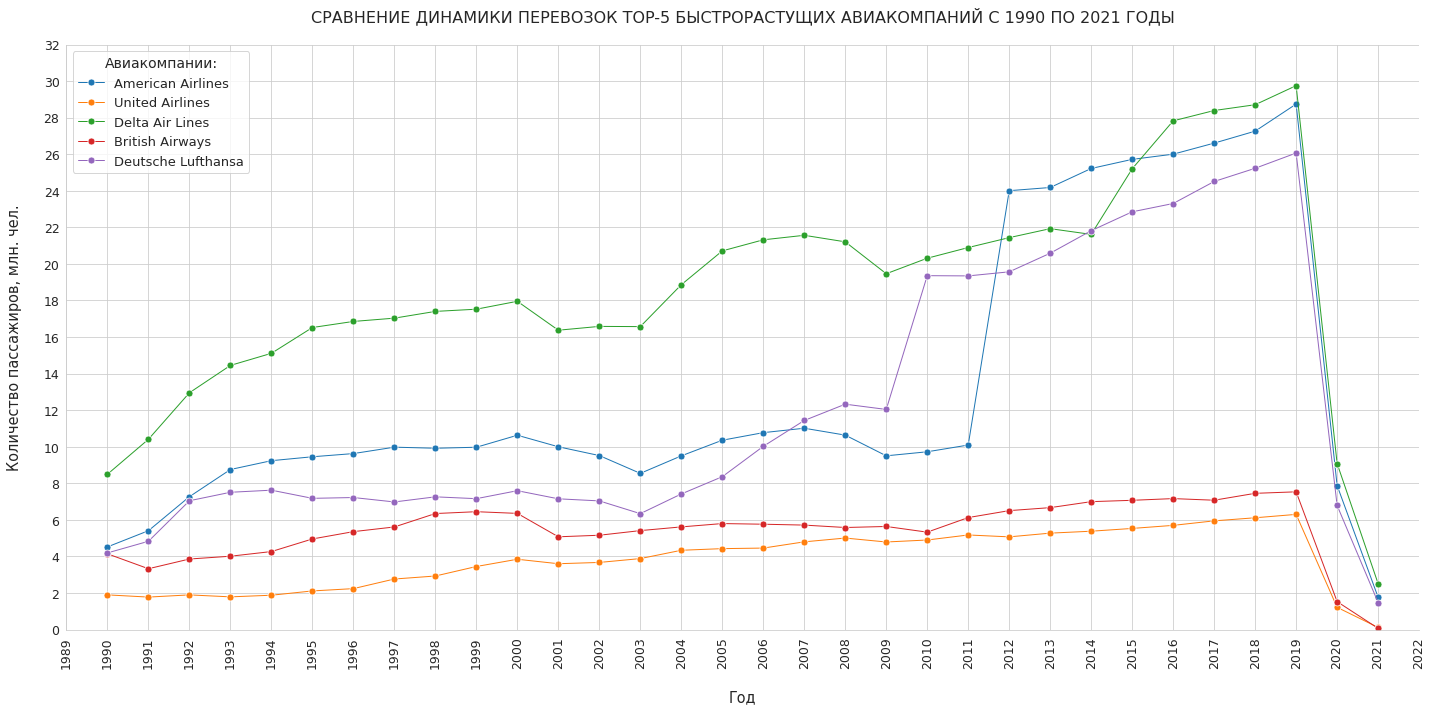

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(20, 10))
sns.set_context(rc = {'lines.linewidth': 1.0, 'lines.markersize': 7})
for carr in list_airID:
    to_plot=df1.query(f'carrier=="{carr}"').groupby('Year')['Total'].sum()
    sns.lineplot(data=to_plot, marker='o', estimator=lambda x: x/1000000)
ax.set(xlim=(1989, 2022), ylim=(0, 32))
plt.title(str.upper('Сравнение динамики перевозок TOP-5 быстрорастущих авиакомпаний с 1990 по 2021 годы\n'), fontsize=16)
plt.legend(title_fontsize=14, fontsize=13, title='Авиакомпании:', bbox_to_anchor=(0.14, 1), labels=carrier_names_2.name)
plt.xlabel('\nГод', fontsize=14.5)
plt.ylabel('Количество пассажиров, млн. чел.\n',fontsize=14.5)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.set_xticklabels(ax.get_xticks().astype(int), fontsize=12.5, rotation=90)
ax.set_yticklabels(ax.get_yticks().astype(int), fontsize=12.5)
plt.tight_layout()
sns.despine()

# Задание 3. Загруженность аэропортов

**Вопрос 1: Нарисуйте топ 5 по загруженности аэропортов В США за все года (1990-2021). По оси Х на графике укажите код аэропорта + город, в котором он находится (город по коду придется найти в открытых источниках), по оси У - кол-во перевезенных людей за все года.**

Ответ:


Подготовим датасет для работы над задачей, сагрегировав суммы перевозок по признаку 'usg_apt' и приведем суммы к миллионам человек:

In [ ]:
df2 = df1.copy()
airports = df2.groupby('usg_apt', as_index=False).agg({'Total': 'sum'}).sort_values('Total', ascending=False)
airports['Total'] = airports['Total'] / 1000000

Выведем пять наиболее загруженных аэропортов США за все время наблюдений:

In [ ]:
top_5_air = airports[['usg_apt', 'Total']].head()
top_5_air['usg_apt'] = top_5_air['usg_apt'].replace({'JFK':'JFK, Нью-Йорк', 'LAX': 'LAX, Лос Анджелес', 'MIA': 'MIA, Майами', 'ORD': 'ORD, Чикаго', 'EWR': 'EWR, Ньюарк'})
top_5_air

,usg_apt,Total
373,"JFK, Нью-Йорк",637.704748
401,"LAX, Лос Анджелес",494.598691
475,"MIA, Майами",492.595411
580,"ORD, Чикаго",291.060609
224,"EWR, Ньюарк",260.198984


Построим график пяти наиболее загруженных аэропортов США в порядке убывания перевозок:

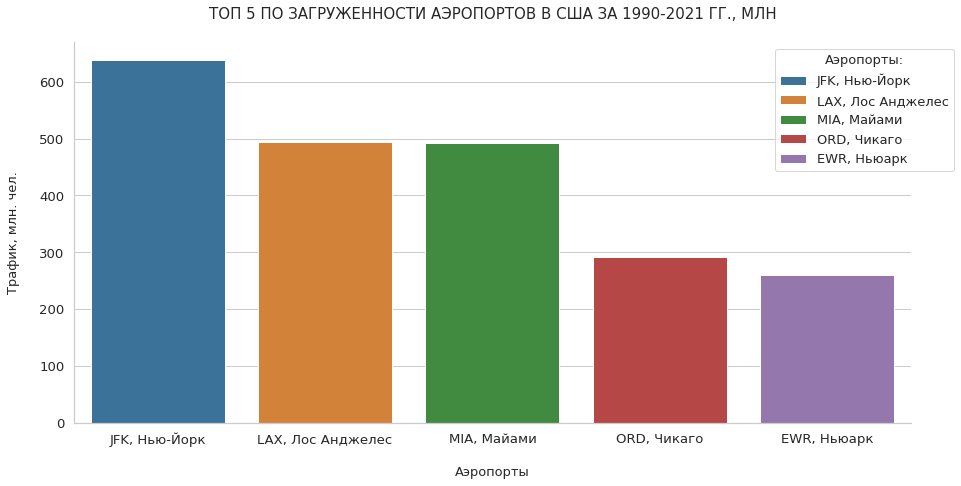

In [88]:
user_palette_5dc = sns.color_palette('tab10', n_colors=5, desat=0.85)
sns.set_style(style='whitegrid')
plt.figure(figsize=(15,7))
brplt = sns.barplot(data=top_5_air,x='usg_apt', y='Total', hue='usg_apt',
                    dodge=False, palette=user_palette_5dc, ci=0)
brplt.set_title(str.upper('Топ 5 по загруженности аэропортов в США за 1990-2021 гг., млн\n'), fontsize=15)
brplt.legend(title='Аэропорты:', title_fontsize=13, fontsize=13, bbox_to_anchor=(0.83, 1))
brplt.set_xlabel('\nАэропорты', fontsize=13)
brplt.set_ylabel('Трафик, млн. чел.\n',fontsize=13)
# brplt.set_xticklabels(labels, fontsize=12.5)
sns.despine()

**Вопрос 2: Нарисуйте топ 5 популярных иностранных аэропортов (ВНЕ США) за все года (1990-2021). По оси Х на графике укажите код аэропорта + город, в котором он находится (город по коду придется найти в открытых источниках), по оси У - кол-во перевезенных людей за все года.**

Ответ:

Подготовим датасет для работы над задачей, сагрегировав суммы перевозок по признаку 'fg_apt' и приведем суммы к миллионам человек.\
Выведем пять наиболее загруженных аэропортов вне США за все время наблюдений и 
построим график пяти наиболее загруженных аэропортов вне США в порядке убывания перевозок:

In [ ]:
airports_int = df2.groupby('fg_apt', as_index=False).agg({'Total': 'sum'}).sort_values('Total', ascending=False)
airports_int['Total'] = airports_int['Total'] / 1000000

In [ ]:
airports_int_top5 = airports_int[['fg_apt', 'Total']].head()
airports_int_top5['fg_apt'] = airports_int_top5['fg_apt'].replace({'LHR': 'LHR, Лондон', 'YYZ': 'YYZ, Торонто', 'NRT': 'NRT, Нарита', 'FRA': 'FRA, Франкфурт', 'CDG': 'CDG, Париж'})
airports_int_top5

,fg_apt,Total
589,"LHR, Лондон",329.502887
1303,"YYZ, Торонто",258.685802
749,"NRT, Нарита",255.191416
369,"FRA, Франкфурт",175.502951
187,"CDG, Париж",155.115746


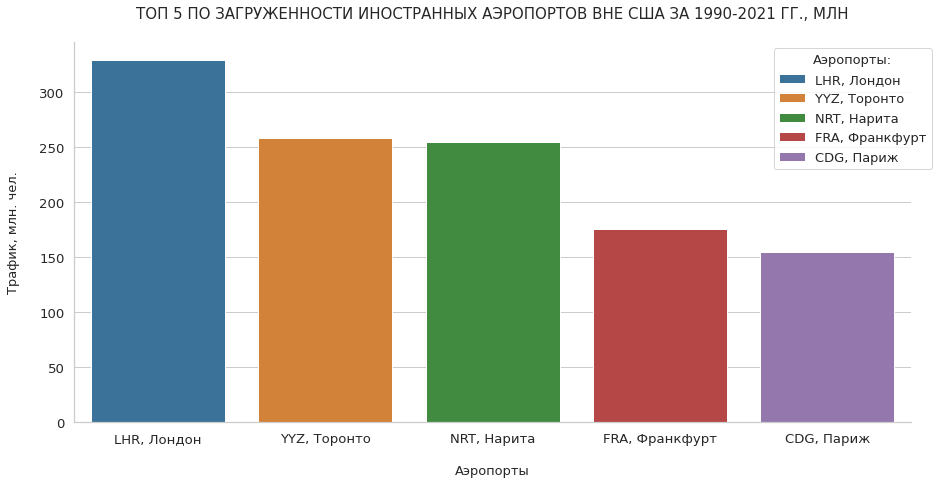

In [86]:
user_palette_5dc = sns.color_palette('tab10', n_colors=5, desat=0.85)
sns.set_style(style='whitegrid')
plt.figure(figsize=(15,7))
brplt = sns.barplot(data=airports_int_top5,x='fg_apt', y='Total', hue='fg_apt',
                    dodge=False, palette=user_palette_5dc, ci=0)
brplt.set_title(str.upper('Топ 5 по загруженности иностранных аэропортов вне США за 1990-2021 гг., млн\n'), fontsize=15)
brplt.legend(title='Аэропорты:', title_fontsize=13, fontsize=13, bbox_to_anchor=(0.828, 1))
brplt.set_xlabel('\nАэропорты', fontsize=13)
brplt.set_ylabel('Трафик, млн. чел.\n',fontsize=13)
# brplt.set_xticklabels(labels, fontsize=12.5)
sns.despine()

In [ ]:
top_int_a=df1.groupby('fg_apt')['Total'].sum()
top_int_a.sort_values(ascending = False).head(5)

fg_apt
LHR    329502887
YYZ    258685802
NRT    255191416
FRA    175502951
CDG    155115746
Name: Total, dtype: int64


LHR - Хитроу (Лондон, Великобритания)
YYZ - Торонто (Канада)
FRA - Франкфурт (Германия)
NRT - Нарита (Токио, Япония)
CDG - им. Шарля де Голя (Париж, Франция)

# Задание 4. Подробный анализ загруженности

**Вопрос 1: Для каждого года выведите топ месяцев, в которых трафик был максимальным (постарайтесь визуализировать так, чтобы с первого взгляда график был понятен и читался "вне контекста")**

Ответ:

Подготовим датасет для работы над задачей, приведем значения перевозок к миллионам человек и сгруппируем его по перевозкам и году, затем отсотриуем, а затем сгруппируем по году, что позволит нам быстро найти пять наиболее загруженных месяцев в каждой группе (году):

In [ ]:
df_task41 = df1.groupby(['Year', 'Month']).agg({'Total': 'sum'})
df_task41.Total = np.round(df_task41.Total.div(1000000), 2)
df_task41_grouped = df_task41.sort_values(by=['Year', 'Total'], ascending=True).groupby(level=0)

In [89]:
index_list_for_max_value = []
for key, group in df_task41_grouped.groups.items():
    #print(df_task41_grouped.get_group(key).tail(5))
    index_list_for_max_value.extend(df_task41_grouped.get_group(key).tail(5).index.tolist())

Сформируем маску полученных максимальных значений в месяцах для дальнейшего построения графика:

In [ ]:
df_task41['MAX_TOP_5'] = df_task41.index.isin(index_list_for_max_value)
df_task41['Mask'] = np.where(df_task41.MAX_TOP_5 == True, (df_task41.Total).astype(str), '')

Создадим сводную таблицу месяц-год со значениями перевозок:

In [ ]:
df_task41_pivot = df_task41.reset_index().pivot('Month', 'Year', 'Total')
df_task41_pivot_labels = df_task41.reset_index().pivot('Month', 'Year', 'Mask')

И построим график распределения трафика по месяцам за весь период наблюдений:

In [ ]:
user_palette_12dc = sns.diverging_palette(240, 10, s=90, l=55, n=12)
labels  = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

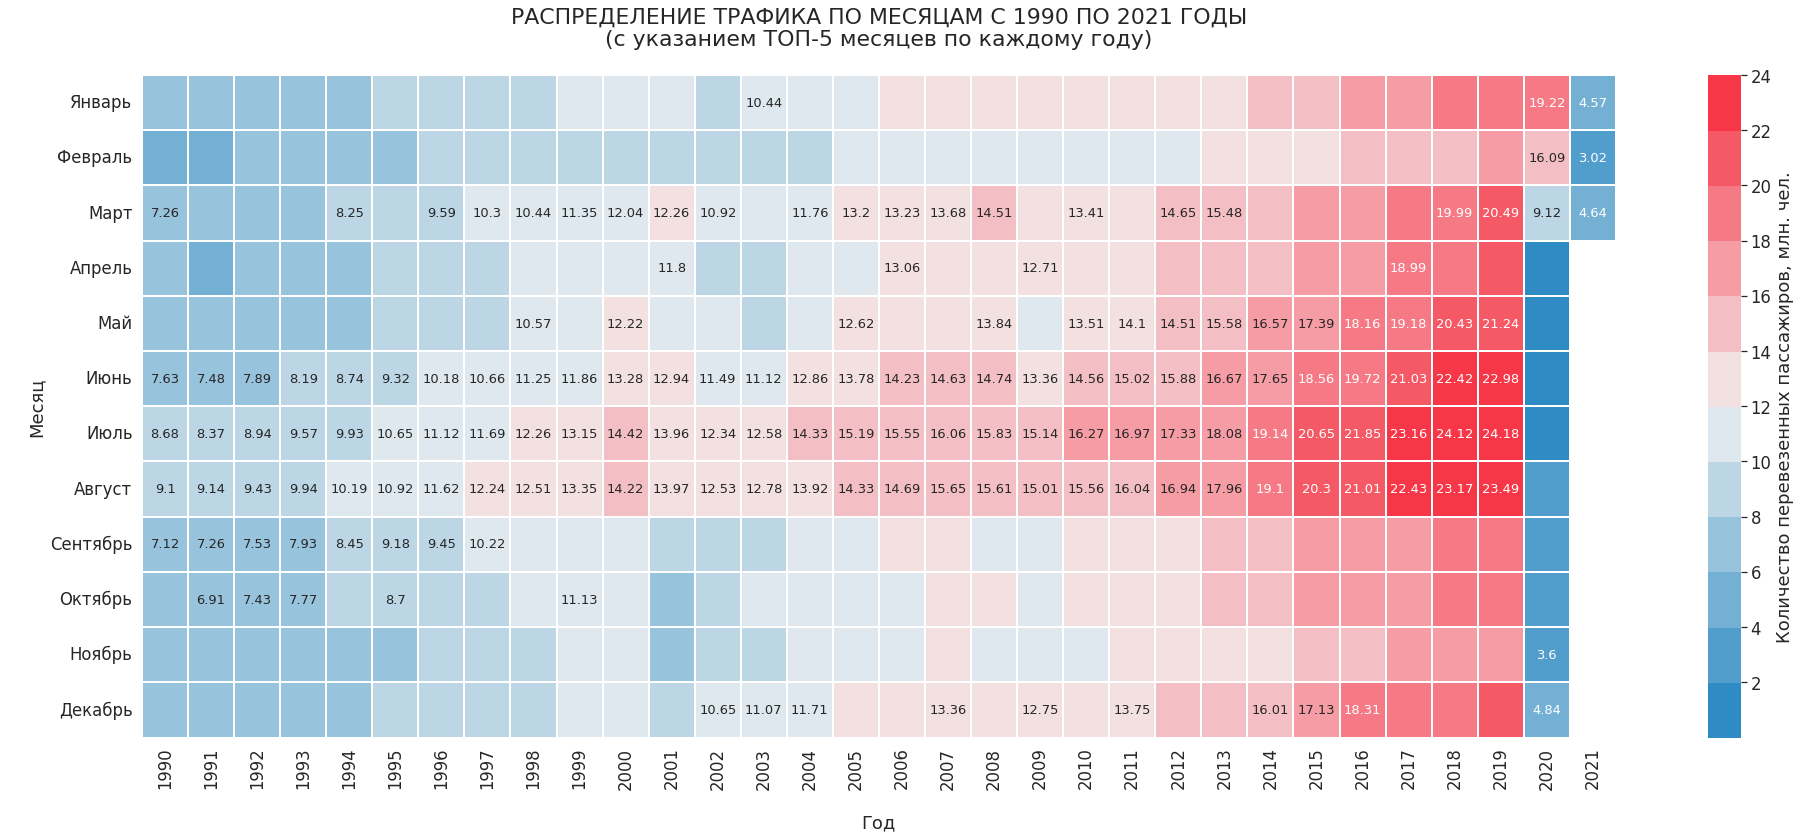

In [ ]:
sns.set_context('notebook', font_scale=1.5)
fig, ax = plt.subplots(1,1,figsize=(28,12))
htmpplt = sns.heatmap(data=df_task41_pivot, 
                      linewidths=1, 
                      cmap=user_palette_12dc, 
                      vmin=0, 
                      vmax=df_task41.Total.max(),
                      annot=df_task41_pivot_labels,
                      annot_kws={'fontsize':13},
                      fmt='',
                      cbar_kws={
                          'label': 'Количество перевезенных пассажиров, млн. чел.',
                          'format': '%.0f'

                      })

colorbar = ax.collections[0].colorbar
D = df_task41.Total.max()
colorbar.set_ticks([1/12*D, 2/12*D, 3/12*D, 4/12*D, 5/12*D, 6/12*D, 7/12*D, 8/12*D, 9/12*D, 10/12*D, 11/12*D, 12/12*D])
htmpplt.set_title(str.upper('Распределение трафика по месяцам c 1990 по 2021 годы\n') + '(с указанием ТОП-5 месяцев по каждому году)\n', fontsize=22)
htmpplt.set_xlabel('\nГод')
htmpplt.set_ylabel('\nМесяц')
htmpplt.set_yticklabels(labels=labels, rotation=0)
htmpplt.set_xticklabels(labels=df_task41.reset_index().Year.unique())
plt.tight_layout()

График показывает, что для всех годов с практически полным постоянством лидируют месяца: июнь, июль, август.

**Вопрос 2: Есть ли какие-то повторяющиеся месяцы, входящие в топ из года в год (или несколько лет подряд)? Если да, то какие для этого могут быть причины? Выдвиньте несколько гипотез.**

Ответ:



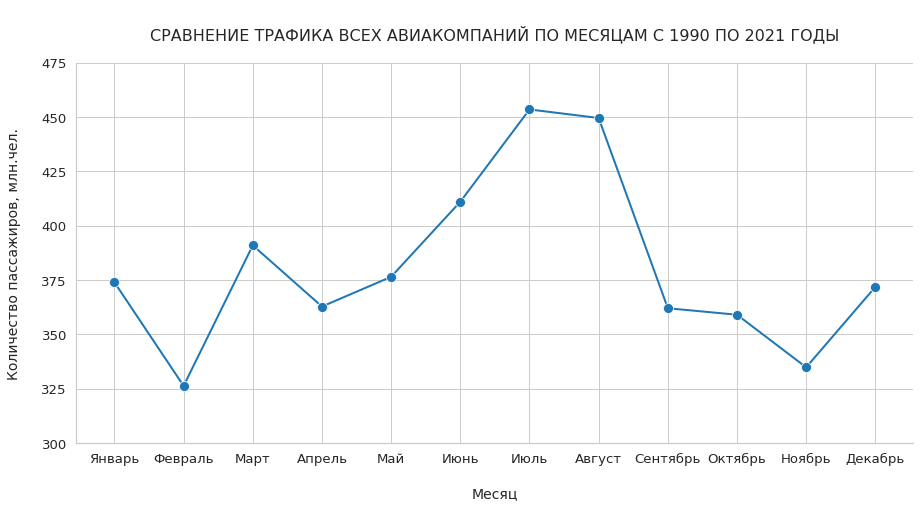

In [ ]:
df_t42 = pd.DataFrame(df1.groupby('Month').Total.sum().reset_index()).drop(columns=['Month'])
df_t42.Total = np.round(df_t42.Total / 1000000, 2)
labels  = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
df_t42['labels'] = labels

user_palette_1c_blue = sns.diverging_palette(240, 240, s=90, l=55, n=1)

plt.figure(figsize=(15,7))
sns.set_style(style='whitegrid')
sns.set_context('notebook', font_scale=1.2, rc = {'lines.linewidth': 2.0, 'lines.markersize': 10})
lnplt = sns.lineplot(data=df_t42, x='labels', y='Total', marker='o', palette=user_palette_1c_blue)
lnplt.set(ylim=(300, 475))
lnplt.set_title(str.upper('\nсравнение трафика всех авиакомпаний по месяцам с 1990 по 2021 годы\n'), fontsize=16)
lnplt.set_xlabel('\nМесяц', fontsize=14)
lnplt.set_ylabel('Количество пассажиров, млн.чел.\n',fontsize=14)
lnplt.yaxis.set_major_locator(MultipleLocator(25))
sns.despine()

График также показывает, что для всех годов с лидируют месяца: июнь, июль, август.

**Вопрос 3: Какое кол-во людей (в процентах) потеряли ТОП 5 авиакомпаний
 за период февраль-декабрь 2020 года, в сравнении с периодом февраль-декабрь 2019 года? Отобразите на графике.**

Ответ:

In [ ]:
df_task43 = pd.concat([df1.query('carrier in ["UA","AA","DL","CO","AC"] & Year==2019'), df1.query('carrier in ["UA","AA","DL","CO","AC"] & Year==2020')])
df_task43_grouped = df_task43.set_index(['Year', 'data_dte']).groupby(level=1).sum().reset_index()
df_task43_grouped['Year'] = df_task43_grouped['data_dte'].apply(lambda k: re.search(r'\w+$', k)[0])
df_task43_grouped['labels'] = df_task43_grouped['data_dte'].apply(lambda k: re.search(r'^\w+', k)[0] + re.search(r'\/\w+$', k)[0])

In [ ]:
per = np.round(100 * df_task43_grouped.query("Year=='2020'").reset_index()['Total'] / df_task43_grouped.query("Year=='2019'").reset_index()['Total'], 2)
per = pd.DataFrame(per)
labels  = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
per['labels'] = labels

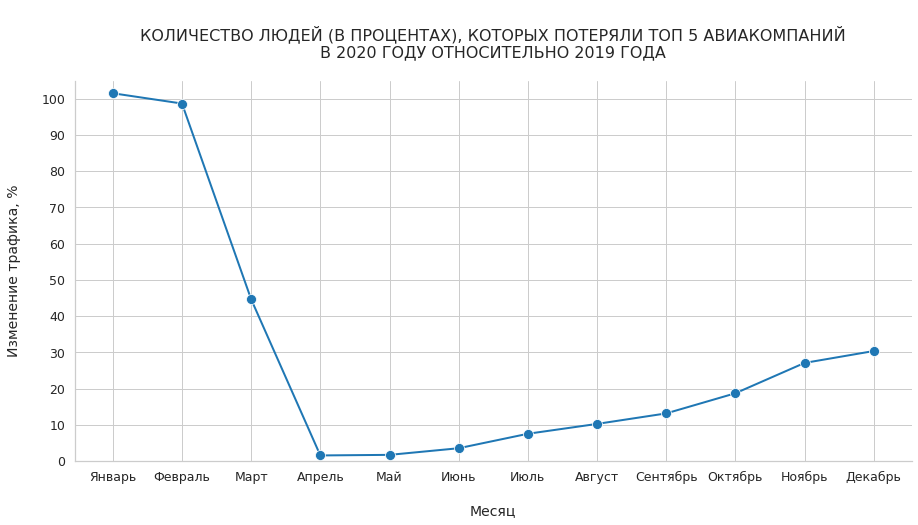

In [ ]:
user_palette_1c_blue = sns.diverging_palette(240, 240, s=90, l=55, n=1)
sns.set_style(style='whitegrid')
plt.figure(figsize=(15,7))
sns.set_context(rc = {'lines.linewidth': 2.0, 'lines.markersize': 10})
lnplt = sns.lineplot(data=per, x='labels', y='Total', marker='o', palette=user_palette_1c_blue)
lnplt.set(ylim=(0, 105))
lnplt.set_title(str.upper('\nколичество людей (в процентах), которых потеряли ТОП 5 авиакомпаний\nв 2020 году относительно 2019 года\n'), fontsize=16)
lnplt.set_xlabel('\nМесяц', fontsize=14)
lnplt.set_ylabel('Изменение трафика, %\n',fontsize=14)
lnplt.yaxis.set_major_locator(MultipleLocator(10))
lnplt.set_xticklabels(per.labels, fontsize=12.5)
lnplt.set_yticklabels(lnplt.get_yticks().astype(int), fontsize=12.5)
sns.despine()

**Вопрос 4: Предположим, что по предварительным рассчетам (на июнь 2019 года) план по перелетам на февраль-декабрь 2020 года был такой же как на февраль-декабрь 2019 года. Если так, то какие фактические убытки понесли ТОП 5 авиакомпаний, если чистая прибыль за 1 человека в среднем = 15$.**

Ответ:

Суммарная потеря составляет 976852425$


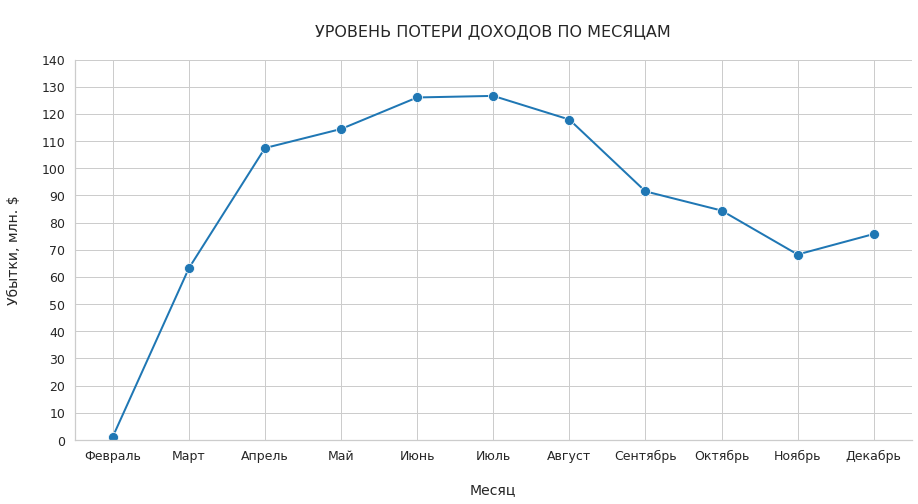

In [93]:
dd2019=df1.query('carrier in ["UA","AA","DL","CO","AC"] & Year==2019').groupby('Month')['Total'].sum()
dd2020=df1.query('carrier in ["UA","AA","DL","CO","AC"] & Year==2020').groupby('Month')['Total'].sum()
money_loss=(dd2019-dd2020)*15
money_loss=money_loss.drop(money_loss.index[0])
labels  = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
user_palette_1c_blue = sns.diverging_palette(240, 240, s=90, l=55, n=1)
sns.set_style(style='whitegrid')
plt.figure(figsize=(15,7))
sns.set_context(rc = {'lines.linewidth': 2.0, 'lines.markersize': 10})
lnplt = sns.lineplot(data=money_loss, marker='o', palette=user_palette_1c_blue, estimator=lambda k: k / 1000000)
lnplt.set(ylim=(0, 140))
lnplt.set_title(str.upper('\nУровень потери доходов по месяцам\n'), fontsize=16)
lnplt.set_xlabel('\nМесяц', fontsize=14)
lnplt.set_ylabel('Убытки, млн. $\n',fontsize=14)
lnplt.yaxis.set_major_locator(MultipleLocator(10))
lnplt.xaxis.set_major_locator(MultipleLocator(1))
lnplt.set_xticklabels(labels, fontsize=12.5)
lnplt.set_yticklabels(lnplt.get_yticks().astype(int), fontsize=12.5)
sns.despine()

print(f"Суммарная потеря составляет {money_loss.sum()}$")

# Задание 5 (Дополнительно)
Здесь Вы можете поэксперементировать - провести собственный анализ, выдвинуть гипотезы относительно данных

In [ ]:
df1.head(10)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
294485,01/01/1990,1990,1,11042,CLE,44,11032,CUN,148,19892,ACQ,0,Passengers,0,796,796
294617,01/01/1990,1990,1,12892,LAX,91,14228,PPT,823,19508,UT,0,Passengers,1790,0,1790
294655,01/01/1990,1990,1,13495,MSY,72,11032,CUN,148,19556,LR,0,Passengers,1515,0,1515
294671,01/01/1990,1990,1,12173,HNL,2,16232,YWG,926,19523,CP,0,Passengers,2370,0,2370
294762,01/01/1990,1990,1,13303,MIA,33,10846,BZE,106,20144,TX,0,Passengers,6489,0,6489
294821,01/01/1990,1990,1,12264,IAD,38,14739,SDQ,224,20312,TZ,1,Passengers,0,191,191
294843,01/01/1990,1990,1,14683,SAT,74,14312,PVR,148,19559,MX,0,Passengers,2532,0,2532
294858,01/01/1990,1990,1,14771,SFO,91,15306,TPE,781,19977,UA,1,Passengers,1779,0,1779
294987,01/01/1990,1990,1,13930,ORD,41,11760,FRA,429,19554,LH,0,Passengers,9352,0,9352
295170,01/01/1990,1990,1,14122,PIT,23,16271,YYZ,936,20355,US,1,Passengers,21,0,21


In [ ]:
top_int_a=df1.query("carriergroup==0").groupby('fg_apt')['Total'].sum()
top_int_a.sort_values(ascending = False).head(5)

fg_apt
LHR    208326962
YYZ    162679161
FRA    106318824
NRT    104138280
CDG     87722766
Name: Total, dtype: int64

In [ ]:
aa = df1.query('Year==1990')['carrier'].value_counts()
len(aa.index)

154

In [101]:
#как менялось количество авиакомпаний?

t_p_5_list=[]

years_to_check = np.arange(1990, 2022)

for year in years_to_check:
    aa = df1.query('Year=='+str(year))['carrier'].value_counts()
    t_p_5 = len(aa.index)
    t_p_5_list.append(t_p_5)
t_p_5 = pd.DataFrame(t_p_5_list , [np.arange(1990, 2022)])
t_p_5

,0
1990,154
1991,159
1992,167
1993,178
1994,178
1995,177
1996,173
1997,183
1998,179
1999,184


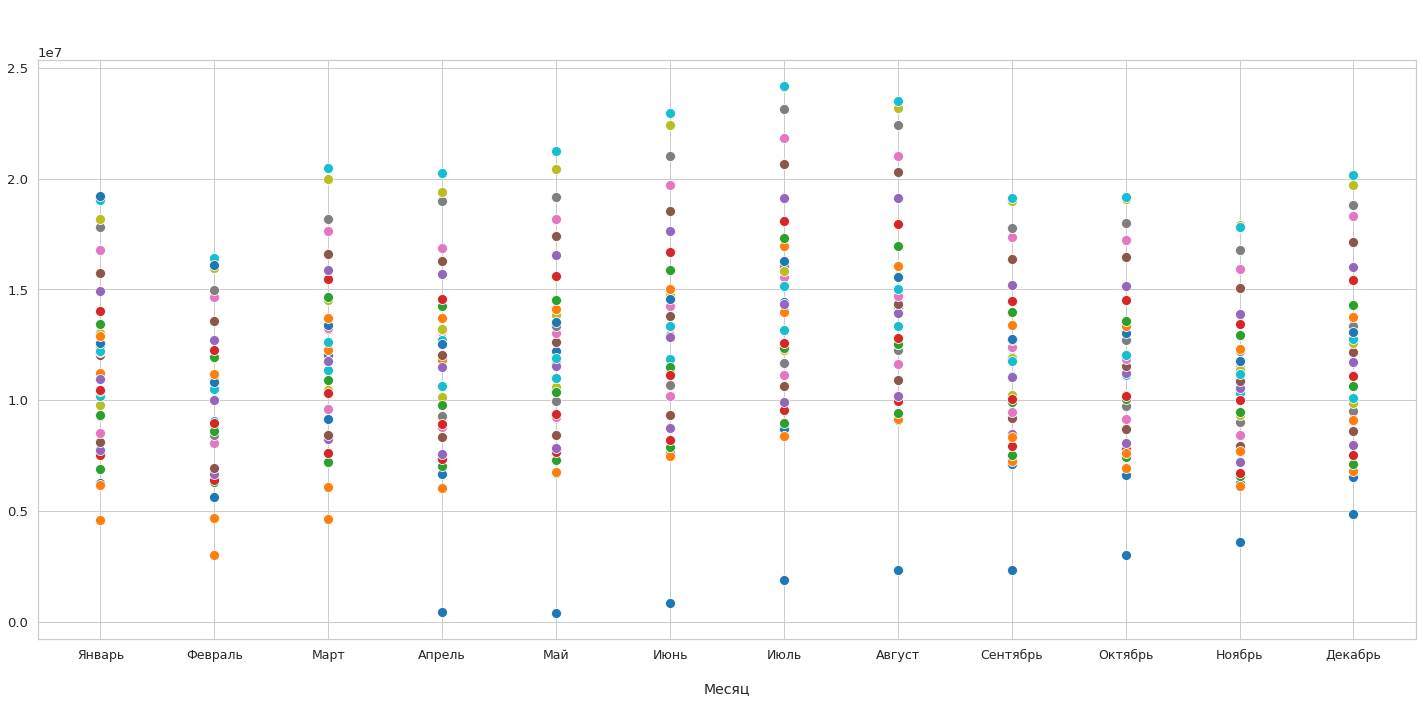

In [ ]:
labels  = ['', 'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

sns.set_style(style='whitegrid')
plt.figure(figsize=(20,10))

years_to_check = np.arange(1990, 2022)

for year in years_to_check:
    gp1 = df1.query('Year=='+str(year)).groupby('Month')['Total'].sum()
    scplt = sns.scatterplot(data = gp1);

scplt.set_title(str.upper('\n\n'), fontsize=16)
scplt.xaxis.set_major_locator(MultipleLocator(1))
scplt.set_xlabel('\nМесяц', fontsize=14)  
scplt.set_ylabel('\n',fontsize=14) # Заголовок Y
scplt.set_xticklabels(labels, fontsize=12.5)
plt.tight_layout()

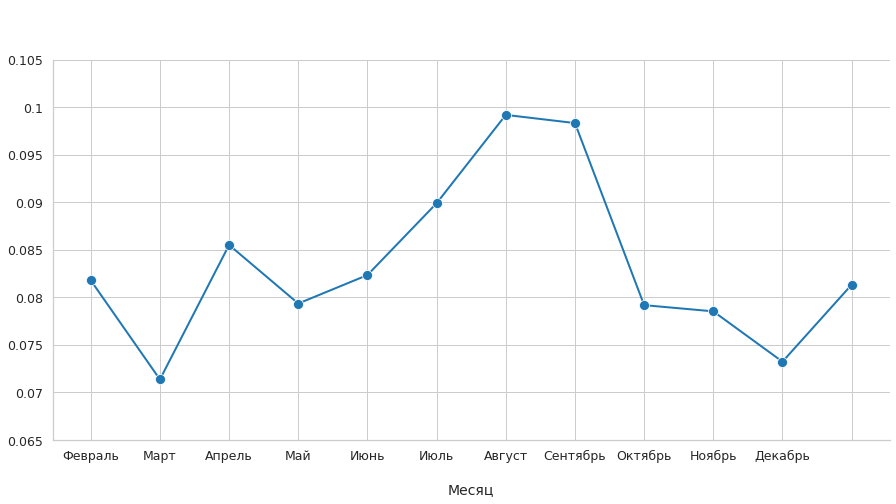

In [ ]:
d42=df1.groupby('Month')['Total'].sum()
dp42=d42/df1['Total'].sum()

labels  = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
user_palette_1c_blue = sns.diverging_palette(240, 240, s=90, l=55, n=1)
sns.set_style(style='whitegrid')
plt.figure(figsize=(15,7))
sns.set_context(rc = {'lines.linewidth': 2.0, 'lines.markersize': 10})
lnplt = sns.lineplot(data=dp42, marker='o', palette=user_palette_1c_blue)
# lnplt = sns.lineplot(data=per, x='labels', y='Total', marker='o', palette=user_palette_1c_blue)
lnplt.set(ylim=(0.065, 0.105))
lnplt.set_title(str.upper('\n\n'), fontsize=16)
lnplt.set_xlabel('\nМесяц', fontsize=14)
lnplt.set_ylabel('\n',fontsize=14) # Заголовок Y
lnplt.yaxis.set_major_locator(MultipleLocator(0.005))
lnplt.xaxis.set_major_locator(MultipleLocator(1))
lnplt.set_xticklabels(labels, fontsize=12.5)
lnplt.set_yticklabels(np.round(lnplt.get_yticks(), 3), fontsize=12.5)
sns.despine()

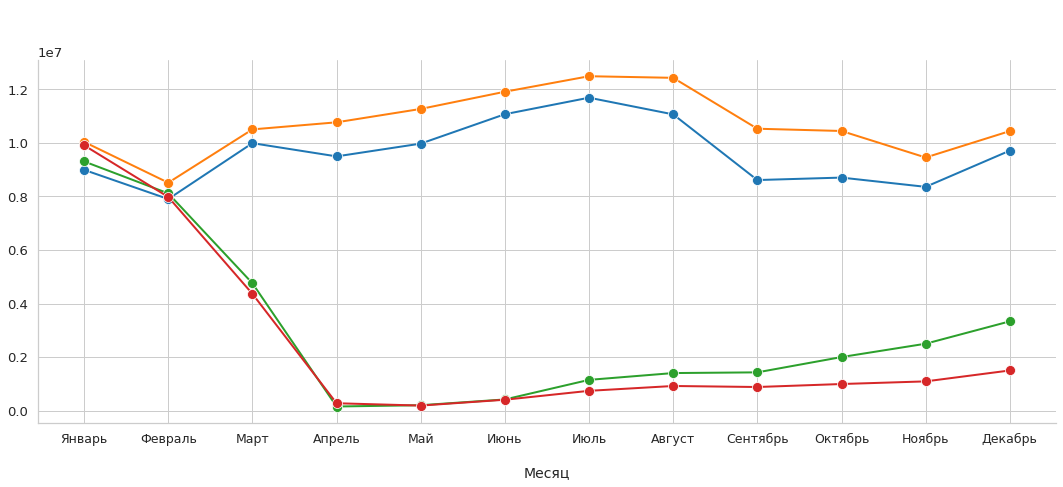

In [ ]:
labels  = ['', 'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

sns.set_style(style='whitegrid')
plt.figure(figsize=(15,7))
bymon2019_loc=df1.query("Year==2019 & carriergroup==1").groupby('Month')['Total'].sum()
bymon2019_int=df1.query("Year==2019 & carriergroup==0").groupby('Month')['Total'].sum()
lnplt = sns.lineplot(data=bymon2019_loc, marker='o');
lnplt = sns.lineplot(data=bymon2019_int, marker='o');
bymon2020_loc=df1.query("Year==2020 & carriergroup==1").groupby('Month')['Total'].sum()
bymon2020_int=df1.query("Year==2020 & carriergroup==0").groupby('Month')['Total'].sum()
lnplt = sns.lineplot(data=bymon2020_loc, marker='o');
lnplt = sns.lineplot(data=bymon2020_int, marker='o');

lnplt.set_title(str.upper('\n\n'), fontsize=16)
lnplt.set_xlabel('\nМесяц', fontsize=14)
lnplt.set_ylabel('\n',fontsize=14) # Заголовок Y

lnplt.xaxis.set_major_locator(MultipleLocator(1))
lnplt.set_xticklabels(labels, fontsize=12.5)


sns.despine()
plt.tight_layout()

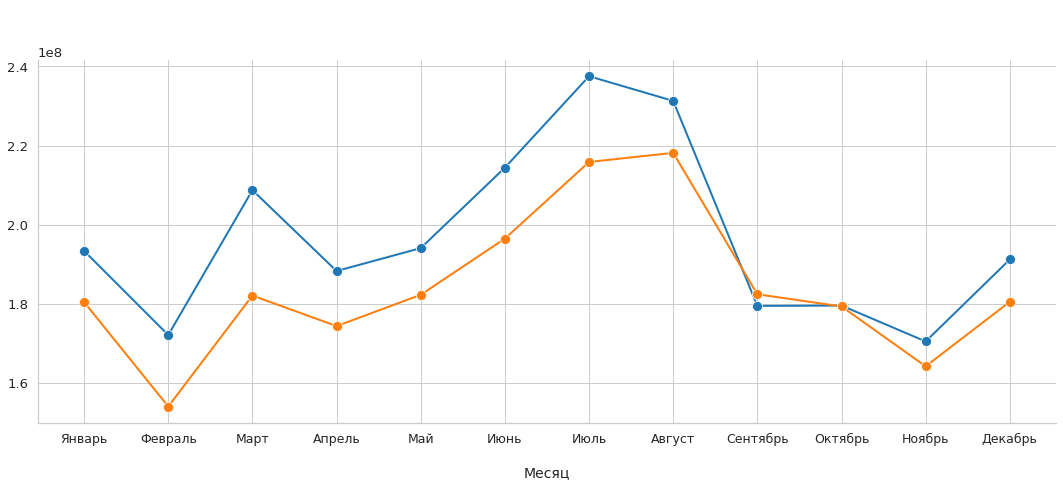

In [106]:
labels  = ['', 'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

sns.set_style(style='whitegrid')
plt.figure(figsize=(15,7))
bymon_loc=df1.query("carriergroup==1").groupby('Month')['Total'].sum()
bymon_int=df1.query("carriergroup==0").groupby('Month')['Total'].sum()
lnplt = sns.lineplot(data=bymon_loc, marker='o');
lnplt = sns.lineplot(data=bymon_int, marker='o');

lnplt.set_title(str.upper('\n\n'), fontsize=16)
lnplt.set_xlabel('\nМесяц', fontsize=14)
lnplt.set_ylabel('\n',fontsize=14) # Заголовок Y

lnplt.xaxis.set_major_locator(MultipleLocator(1))
lnplt.set_xticklabels(labels, fontsize=12.5)


sns.despine()
plt.tight_layout()

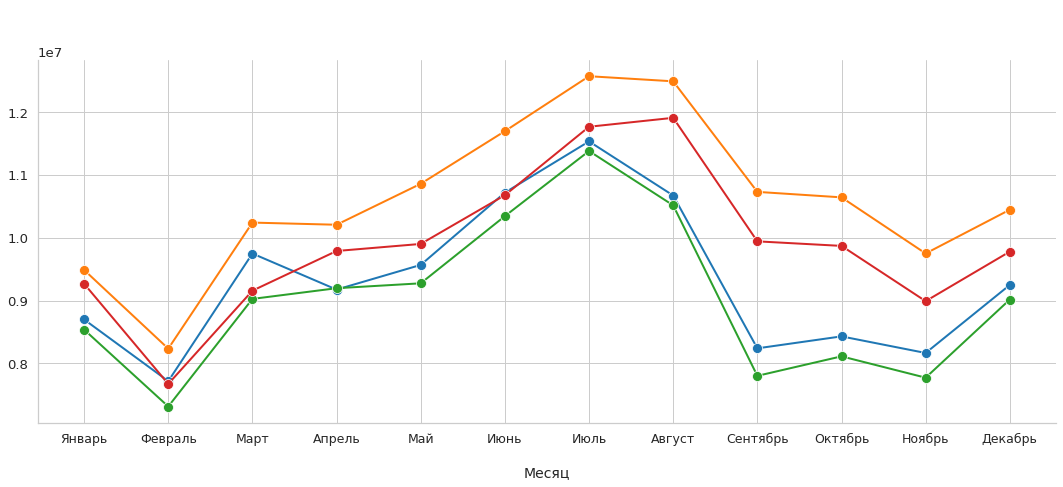

In [ ]:
# bymon2018_loc=df1.query("Year==2018 & carriergroup==1").groupby('Month')['Total'].sum()
# bymon2018_int=df1.query("Year==2018 & carriergroup==0").groupby('Month')['Total'].sum()
# sns.lineplot(data=bymon2018_loc);
# sns.lineplot(data=bymon2018_int);
# bymon2017_loc=df1.query("Year==2017 & carriergroup==1").groupby('Month')['Total'].sum()
# bymon2017_int=df1.query("Year==2017 & carriergroup==0").groupby('Month')['Total'].sum()
# sns.lineplot(data=bymon2017_loc);
# sns.lineplot(data=bymon2017_int);

labels  = ['', 'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

sns.set_style(style='whitegrid')
plt.figure(figsize=(15,7))
bymon2018_loc=df1.query("Year==2018 & carriergroup==1").groupby('Month')['Total'].sum()
bymon2018_int=df1.query("Year==2018 & carriergroup==0").groupby('Month')['Total'].sum()
lnplt = sns.lineplot(data=bymon2018_loc, marker='o');
lnplt = sns.lineplot(data=bymon2018_int, marker='o');
bymon2017_loc=df1.query("Year==2017 & carriergroup==1").groupby('Month')['Total'].sum()
bymon2017_int=df1.query("Year==2017 & carriergroup==0").groupby('Month')['Total'].sum()
lnplt = sns.lineplot(data=bymon2017_loc, marker='o');
lnplt = sns.lineplot(data=bymon2017_int, marker='o');

lnplt.set_title(str.upper('\n\n'), fontsize=16)
lnplt.set_xlabel('\nМесяц', fontsize=14)
lnplt.set_ylabel('\n',fontsize=14) # Заголовок Y

lnplt.xaxis.set_major_locator(MultipleLocator(1))
lnplt.set_xticklabels(labels, fontsize=12.5)


sns.despine()
plt.tight_layout()

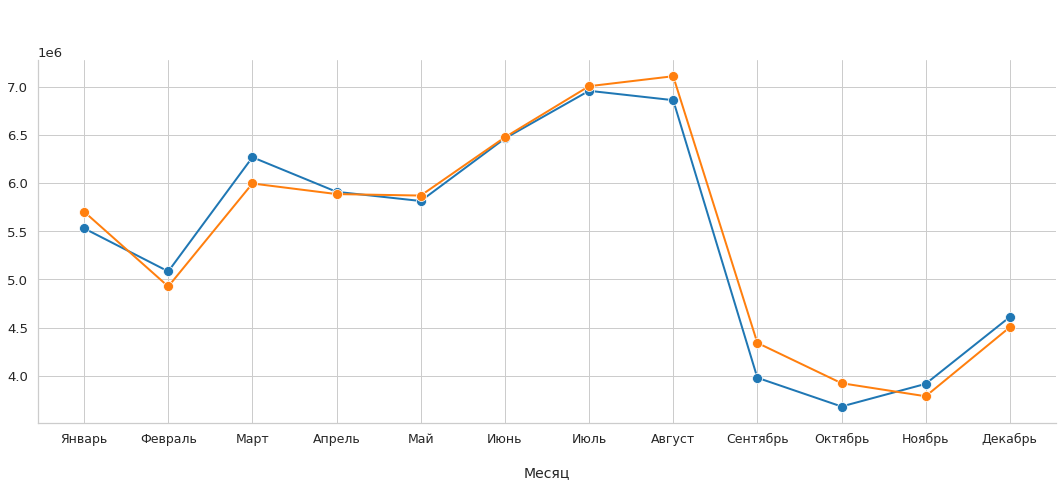

In [94]:
# bymon2001_loc=df1.query("Year==2001 & carriergroup==1").groupby('Month')['Total'].sum()
# bymon2001_int=df1.query("Year==2001 & carriergroup==0").groupby('Month')['Total'].sum()
# sns.lineplot(data=bymon2001_loc);
# sns.lineplot(data=bymon2001_int);
# bymon2002_loc=df1.query("Year==2002 & carriergroup==1").groupby('Month')['Total'].sum()
# bymon2002_int=df1.query("Year==2002 & carriergroup==0").groupby('Month')['Total'].sum()
# sns.lineplot(data=bymon2002_loc);
# sns.lineplot(data=bymon2002_int);

labels  = ['', 'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

sns.set_style(style='whitegrid')
plt.figure(figsize=(15,7))
bymon2001_loc=df1.query("Year==2001 & carriergroup==1").groupby('Month')['Total'].sum()
bymon2001_int=df1.query("Year==2001 & carriergroup==0").groupby('Month')['Total'].sum()
lnplt = sns.lineplot(data=bymon2001_loc, marker='o');
lnplt = sns.lineplot(data=bymon2001_int, marker='o');
bymon2002_loc=df1.query("Year==2002 & carriergroup==1").groupby('Month')['Total'].sum()
bymon2002_int=df1.query("Year==2002 & carriergroup==0").groupby('Month')['Total'].sum()
#lnplt = sns.lineplot(data=bymon2002_loc, marker='o');
#lnplt = sns.lineplot(data=bymon2002_int, marker='o');

lnplt.set_title(str.upper('\n\n'), fontsize=16)
lnplt.set_xlabel('\nМесяц', fontsize=14)
lnplt.set_ylabel('\n',fontsize=14) # Заголовок Y

lnplt.xaxis.set_major_locator(MultipleLocator(1))
lnplt.set_xticklabels(labels, fontsize=12.5)


sns.despine()
plt.tight_layout()

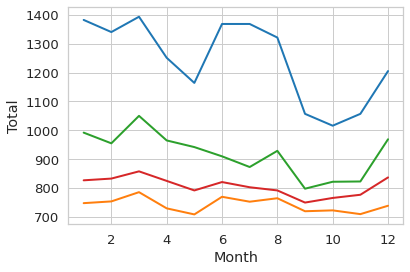

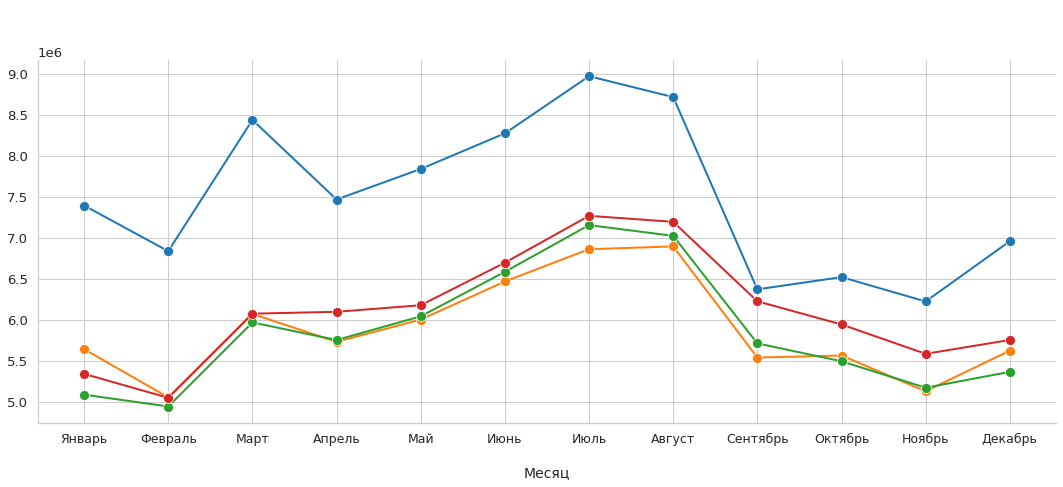

In [ ]:
bymon2008_loc=df1.query("Year==2008 & carriergroup==1").groupby('Month')['Total'].count()
bymon2008_int=df1.query("Year==2008 & carriergroup==0").groupby('Month')['Total'].count()
sns.lineplot(data=bymon2008_loc);
sns.lineplot(data=bymon2008_int);
bymon2000_loc=df1.query("Year==2000 & carriergroup==1").groupby('Month')['Total'].count()
bymon2000_int=df1.query("Year==2000 & carriergroup==0").groupby('Month')['Total'].count()
sns.lineplot(data=bymon2000_loc);
sns.lineplot(data=bymon2000_int);


labels  = ['', 'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

sns.set_style(style='whitegrid')
plt.figure(figsize=(15,7))
bymon2008_loc=df1.query("Year==2008 & carriergroup==1").groupby('Month')['Total'].sum()
bymon2008_int=df1.query("Year==2008 & carriergroup==0").groupby('Month')['Total'].sum()
lnplt = sns.lineplot(data=bymon2008_loc, marker='o');
lnplt = sns.lineplot(data=bymon2008_int, marker='o');
bymon2000_loc=df1.query("Year==2000 & carriergroup==1").groupby('Month')['Total'].sum()
bymon2000_int=df1.query("Year==2000 & carriergroup==0").groupby('Month')['Total'].sum()
lnplt = sns.lineplot(data=bymon2000_loc, marker='o');
lnplt = sns.lineplot(data=bymon2000_int, marker='o');

lnplt.set_title(str.upper('\n\n'), fontsize=16)
lnplt.set_xlabel('\nМесяц', fontsize=14)
lnplt.set_ylabel('\n',fontsize=14) # Заголовок Y

lnplt.xaxis.set_major_locator(MultipleLocator(1))
lnplt.set_xticklabels(labels, fontsize=12.5)


sns.despine()
plt.tight_layout()

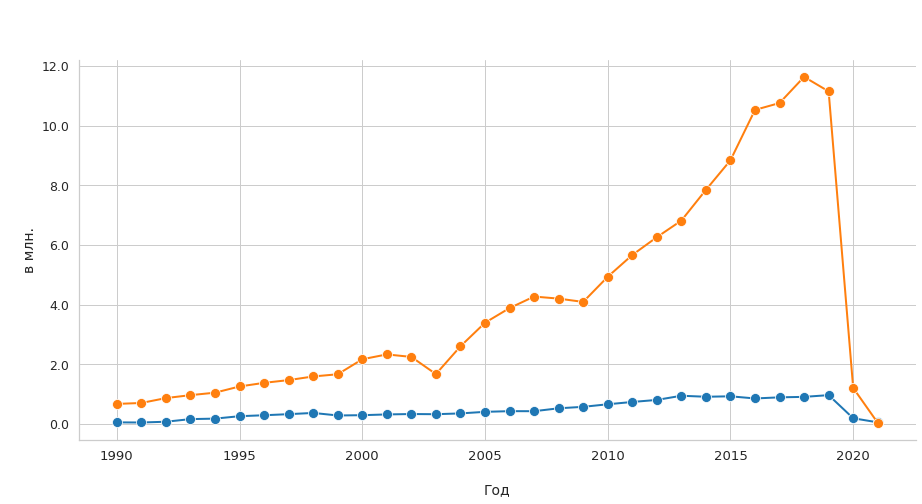

In [111]:
pas_rf=df1.query("fg_apt in ['DME', 'MOW', 'SVO', 'VKO', 'LED']").groupby('Year')['Total'].sum()
# sns.lineplot(data=pas_rf)
pas_cn=df1.query("fg_apt in ['HKG', 'CAN', 'PKX', 'PEK', 'PVG']").groupby('Year')['Total'].sum()
#sns.lineplot(data=pas_cn)
#print(pas_cn, pas_rf)

# labels  = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
user_palette_1c_blue = sns.diverging_palette(240, 240, s=90, l=55, n=1)
sns.set_style(style='whitegrid')
plt.figure(figsize=(15,7))
sns.set_context(rc = {'lines.linewidth': 2.0, 'lines.markersize': 10})
lnplt = sns.lineplot(data=pas_rf, marker='o', palette=user_palette_1c_blue, estimator=lambda k: k / 1000000)
lnplt = sns.lineplot(data=pas_cn, marker='o', palette=user_palette_1c_blue, estimator=lambda k: k / 1000000)
# lnplt.set(ylim=(0.065, 0.105))
lnplt.set_title(str.upper('\n\n'), fontsize=16)
lnplt.set_xlabel('\nГод', fontsize=14)
lnplt.set_ylabel('\nв млн.',fontsize=14) # Заголовок Y
# lnplt.yaxis.set_major_locator(MultipleLocator(0.005))
# lnplt.xaxis.set_major_locator(MultipleLocator(1))
# lnplt.set_xticklabels(labels, fontsize=12.5)
lnplt.set_yticklabels(np.round(lnplt.get_yticks(), 2), fontsize=12.5)
sns.despine()

1. В октябре стабильно идет провал по внутренним перелетом с одновременным ростом международных полетов.
2.Количество авиакомпаний растет вместе с количеством перевезенных пассажиров.При этом количество АК сократилось за 2020й год более чем на 25%.
3.Динимака перелетов зависит от каникул и праздников (пик - новый год, провал - февраль, пик - март, провал май, пик - июль, август, провал - сентябрь, ноябрь)
4. В 2020 году внутренние перевозки восстанавливаются быстрее международных.
5. Терракт 11.09.2001 повлиял на снижение траффика (народ боялся летать)
6. Финансовый кризис в сентябре 2008 года и биржевой крах "доткомов" в марте 2000 года не оказали влияния на объемы перелетов.
7. Обострение политического диалога с 2012 с РФ, а также с КНР с 2017 года не оказало негативного влияния на объем пассажирских перевозок из указанных стран